In [6]:
import pandas as pd
import numpy as np
import scipy as sc
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('fivethirtyeight')

pd.set_option('display.max_rows', 50)
pd.set_option('display.max_columns', 50)

In [4]:
# Set display format to avoid scientific notation, setting format to two decimal places for floating point numbers
pd.set_option('display.float_format', '{:.2f}'.format)

In [7]:
# Load IMDb datasets for movie ratings and basic movie information and store it in dataframe variables
imdb_ratings = pd.read_csv('Raw Data/title.ratingsNEW.tsv.gz', sep='\t', low_memory=False)

title_basics = pd.read_csv('Raw Data/title.basicsNEW.tsv.gz', sep='\t', low_memory=False)

In [3]:
#Display the first 5 rows of the ratings dataset
print(imdb_ratings.head())

      tconst  averageRating  numVotes
0  tt0000001            5.7      2041
1  tt0000002            5.7       272
2  tt0000003            6.5      1993
3  tt0000004            5.4       178
4  tt0000005            6.2      2751


In [5]:
#Check the column-wise info of the ratings dataset
imdb_ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1420877 entries, 0 to 1420876
Data columns (total 3 columns):
 #   Column         Non-Null Count    Dtype  
---  ------         --------------    -----  
 0   tconst         1420877 non-null  object 
 1   averageRating  1420877 non-null  float64
 2   numVotes       1420877 non-null  int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 32.5+ MB


In [8]:
#Rename columuns and print first 5 rows again
imdb_ratings.columns = ["Title ID", "Average Rating", "Number of Ratings"]
print(imdb_ratings.head())

    Title ID  Average Rating  Number of Ratings
0  tt0000001            5.70               2041
1  tt0000002            5.70                272
2  tt0000003            6.50               1993
3  tt0000004            5.40                178
4  tt0000005            6.20               2751


In [9]:
#Double check that there aren't titles without ratings
imdb_ratings.isnull().sum()

Title ID             0
Average Rating       0
Number of Ratings    0
dtype: int64

In [11]:
f'If this number {len(imdb_ratings["Title ID"].unique())} is equal to {imdb_ratings["Title ID"].count()}, then all the titles rated in this dataset are unique.'

'If this number 1420877 is equal to 1420877, then all the titles rated in this dataset are unique.'

In [12]:
# Count the number of ratings for each unique rating value
imdb_ratings['Average Rating'].value_counts()

Average Rating
7.20    53466
7.40    51173
7.60    50585
7.80    49787
7.00    48685
        ...  
1.60      475
1.40      428
1.20      411
1.30      340
1.10      326
Name: count, Length: 91, dtype: int64

In [13]:
# Generate a statistical summary of the average ratings
imdb_ratings['Average Rating'].describe()

count   1420877.00
mean          6.95
std           1.39
min           1.00
25%           6.20
50%           7.10
75%           7.90
max          10.00
Name: Average Rating, dtype: float64

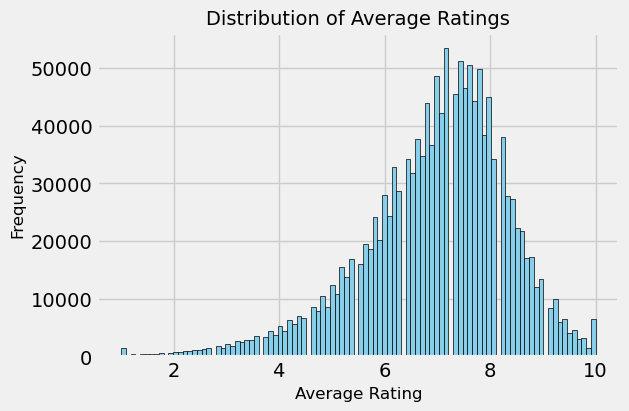

In [19]:
#Create a histogram of the average ratings to visualize the distribution

plt.figure(figsize=(6, 4))  # size of the plot
plt.hist(imdb_ratings['Average Rating'], bins=100, color='skyblue', edgecolor='black') 
plt.title('Distribution of Average Ratings', fontsize=14) # adding a title
plt.xlabel('Average Rating', fontsize=12)  # Adding a x-axis label
plt.ylabel('Frequency', fontsize=12)  # Adding a y-axis label
plt.show()

In [20]:
title_basics.head()

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres
0,tt0000001,short,Carmencita,Carmencita,0,1894,\N,1,"Documentary,Short"
1,tt0000002,short,Le clown et ses chiens,Le clown et ses chiens,0,1892,\N,5,"Animation,Short"
2,tt0000003,short,Pauvre Pierrot,Pauvre Pierrot,0,1892,\N,4,"Animation,Comedy,Romance"
3,tt0000004,short,Un bon bock,Un bon bock,0,1892,\N,12,"Animation,Short"
4,tt0000005,short,Blacksmith Scene,Blacksmith Scene,0,1893,\N,1,"Comedy,Short"


In [21]:
#rename columns
title_basics.columns = ["Title ID", "Title Type", "Primary Title", "Original Title", "Is Adult", "Start Year", "End Year", "Runtime (minutes)", "Genres"]
title_basics

,Title ID,Title Type,Primary Title,Original Title,Is Adult,Start Year,End Year,Runtime (minutes),Genres
0,tt0000001,short,Carmencita,Carmencita,0,1894,\N,1,"Documentary,Short"
1,tt0000002,short,Le clown et ses chiens,Le clown et ses chiens,0,1892,\N,5,"Animation,Short"
2,tt0000003,short,Pauvre Pierrot,Pauvre Pierrot,0,1892,\N,4,"Animation,Comedy,Romance"
3,tt0000004,short,Un bon bock,Un bon bock,0,1892,\N,12,"Animation,Short"
4,tt0000005,short,Blacksmith Scene,Blacksmith Scene,0,1893,\N,1,"Comedy,Short"
...,...,...,...,...,...,...,...,...,...
10851639,tt9916848,tvEpisode,Episode #3.17,Episode #3.17,0,2009,\N,\N,"Action,Drama,Family"
10851640,tt9916850,tvEpisode,Episode #3.19,Episode #3.19,0,2010,\N,\N,"Action,Drama,Family"
10851641,tt9916852,tvEpisode,Episode #3.20,Episode #3.20,0,2010,\N,\N,"Action,Drama,Family"
10851642,tt9916856,short,The Wind,The Wind,0,2015,\N,27,Short


In [22]:
title_basics.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10851644 entries, 0 to 10851643
Data columns (total 9 columns):
 #   Column             Dtype 
---  ------             ----- 
 0   Title ID           object
 1   Title Type         object
 2   Primary Title      object
 3   Original Title     object
 4   Is Adult           object
 5   Start Year         object
 6   End Year           object
 7   Runtime (minutes)  object
 8   Genres             object
dtypes: object(9)
memory usage: 745.1+ MB


In [23]:
title_basics.describe()

,Title ID,Title Type,Primary Title,Original Title,Is Adult,Start Year,End Year,Runtime (minutes),Genres
count,10851644,10851644,10851626,10851626,10851644,10851644,10851644,10851644,10851434
unique,10851644,11,4801340,4824778,28,153,97,909,2371
top,tt0000001,tvEpisode,Episode #1.1,Episode #1.1,0,\N,\N,\N,Drama
freq,1,8264141,52059,52059,10508939,1404468,10726338,7420570,1232559


In [24]:
# Convert numerical columns to numerical format
# Coerce converts any conversion errors into NaN values and astype("Int64") converts values back to integer type explicitly
title_basics['Start Year'] = pd.to_numeric(title_basics['Start Year'], errors='coerce').astype('Int64')
title_basics['End Year'] = pd.to_numeric(title_basics['End Year'], errors='coerce').astype('Int64')
title_basics['Runtime (minutes)'] = pd.to_numeric(title_basics['Runtime (minutes)'], errors='coerce')

In [25]:
title_basics.isnull().sum()

Title ID                    0
Title Type                  0
Primary Title              18
Original Title             18
Is Adult                    0
Start Year            1404468
End Year             10726338
Runtime (minutes)     7420780
Genres                    210
dtype: int64

In [26]:
title_basics

,Title ID,Title Type,Primary Title,Original Title,Is Adult,Start Year,End Year,Runtime (minutes),Genres
0,tt0000001,short,Carmencita,Carmencita,0,1894,<NA>,1.00,"Documentary,Short"
1,tt0000002,short,Le clown et ses chiens,Le clown et ses chiens,0,1892,<NA>,5.00,"Animation,Short"
2,tt0000003,short,Pauvre Pierrot,Pauvre Pierrot,0,1892,<NA>,4.00,"Animation,Comedy,Romance"
3,tt0000004,short,Un bon bock,Un bon bock,0,1892,<NA>,12.00,"Animation,Short"
4,tt0000005,short,Blacksmith Scene,Blacksmith Scene,0,1893,<NA>,1.00,"Comedy,Short"
...,...,...,...,...,...,...,...,...,...
10851639,tt9916848,tvEpisode,Episode #3.17,Episode #3.17,0,2009,<NA>,NaN,"Action,Drama,Family"
10851640,tt9916850,tvEpisode,Episode #3.19,Episode #3.19,0,2010,<NA>,NaN,"Action,Drama,Family"
10851641,tt9916852,tvEpisode,Episode #3.20,Episode #3.20,0,2010,<NA>,NaN,"Action,Drama,Family"
10851642,tt9916856,short,The Wind,The Wind,0,2015,<NA>,27.00,Short


In [27]:
# Counting the number of occurrences of each unique value in the 'Is Adult' column
unique_value_counts = title_basics['Is Adult'].value_counts()

# Printing the counts
print(unique_value_counts)


Is Adult
0       10508939
1         342495
1985          29
2015          28
1978          25
2016          20
2017          17
1984          14
1987          10
2018           9
2020           9
2013           8
2019           7
2014           6
2023           6
1983           6
1986           2
1980           2
1982           2
2022           2
1977           1
1981           1
\N             1
1979           1
2021           1
2012           1
2011           1
2005           1
Name: count, dtype: int64


In [28]:
# Replace values that are not '0' or '1' with NaN in the Is Adult column. Start by converting all values in the column into numberical formart
title_basics['Is Adult'] = pd.to_numeric(title_basics['Is Adult'], errors='coerce')

# Any value that is not numerical is now NaN. Next convert the column to boolean values
# NaN values will remain as NaN
title_basics['Is Adult'] = title_basics['Is Adult'].map({0: False, 1: True})

# Check the unique values again
print(title_basics['Is Adult'].unique())

# Check the DataFrame
print(title_basics)

[False True nan]
           Title ID Title Type              Primary Title  \
0         tt0000001      short                 Carmencita   
1         tt0000002      short     Le clown et ses chiens   
2         tt0000003      short             Pauvre Pierrot   
3         tt0000004      short                Un bon bock   
4         tt0000005      short           Blacksmith Scene   
...             ...        ...                        ...   
10851639  tt9916848  tvEpisode              Episode #3.17   
10851640  tt9916850  tvEpisode              Episode #3.19   
10851641  tt9916852  tvEpisode              Episode #3.20   
10851642  tt9916856      short                   The Wind   
10851643  tt9916880  tvEpisode  Horrid Henry Knows It All   

                     Original Title Is Adult  Start Year  End Year  \
0                        Carmencita    False        1894      <NA>   
1            Le clown et ses chiens    False        1892      <NA>   
2                    Pauvre Pierrot    F

In [31]:
#Removing values in the start year column that aren't years

# Convert the 'Start Year' column to string format
title_basics['Start Year'] = title_basics['Start Year'].astype(str)

# Filter out four-digit numbers from the column
title_basics = title_basics[title_basics['Start Year'].apply(lambda x: len(x) == 4)]

# Replace non-numeric values with NaN
title_basics['Start Year'] = pd.to_numeric(title_basics['Start Year'], errors='coerce')

# Drop rows with NaN 'Start Year'
title_basics = title_basics.dropna(subset=['Start Year'])

# Convert 'Start Year' back to integer format
title_basics['Start Year'] = title_basics['Start Year'].astype(int)

In [35]:
# Check how many movies were release after 2023
unique_years_counts_after_2023 = title_basics[title_basics['Start Year'] > 2023]['Start Year'].value_counts()

print(unique_years_counts_after_2023)


Start Year
2024    85806
2025     1041
2026      161
2027       27
2029       10
2030        9
2031        2
2028        1
Name: count, dtype: int64


In [36]:
#Since we are only interested in analyzing movies from the past 100 years, we can filter our data to exclude movies prior to 1920

#But we must also filter our start year data to remove movies produced in 2024 because of incomplete data or movies pending release after 2024

title_basics = title_basics[(title_basics['Start Year'] <= 2023) & (title_basics['Start Year'] >= 1920)]

In [37]:
# Find the number of unique types of films
count_unique_filmtypes = title_basics['Title Type'].value_counts()
print(count_unique_filmtypes)

Title Type
tvEpisode       6961076
short            881130
movie            589176
video            290559
tvSeries         243457
tvMovie          143897
tvMiniSeries      50617
tvSpecial         46838
videoGame         37135
tvShort           10383
tvPilot               1
Name: count, dtype: int64


In [38]:
# filter movie_basics df to include only rows where the Title Type column has values 'movie' or 'tvMovie'
filtered_movies = title_basics[title_basics['Title Type'].isin(['movie', 'tvMovie'])]

# Check the first few rows of the filtered DataFrame
filtered_movies

,Title ID,Title Type,Primary Title,Original Title,Is Adult,Start Year,End Year,Runtime (minutes),Genres
3846,tt0003854,movie,Dodge City Trail,Dodge City Trail,False,1936,<NA>,56.00,"Drama,Music,Western"
5067,tt0005076,movie,Charley's Aunt,Charley's Aunt,False,1925,<NA>,80.00,Comedy
5920,tt0005929,movie,The Prince of Pep,The Prince of Pep,False,1925,<NA>,NaN,"Drama,Thriller"
6616,tt0006626,movie,Elnémult harangok,Elnémult harangok,False,1922,<NA>,52.00,\N
8410,tt0008422,movie,Perils of the West,Perils of the West,False,1922,<NA>,NaN,Western
...,...,...,...,...,...,...,...,...,...
10851562,tt9916680,movie,De la ilusión al desconcierto: cine colombiano...,De la ilusión al desconcierto: cine colombiano...,False,2007,<NA>,100.00,Documentary
10851567,tt9916692,tvMovie,Teatroteka: Czlowiek bez twarzy,Teatroteka: Czlowiek bez twarzy,False,2015,<NA>,66.00,Drama
10851574,tt9916706,movie,Dankyavar Danka,Dankyavar Danka,False,2013,<NA>,NaN,Comedy
10851584,tt9916730,movie,6 Gunn,6 Gunn,False,2017,<NA>,116.00,Drama


In [39]:
filtered_movies.isnull().sum()

Title ID                  0
Title Type                0
Primary Title             2
Original Title            2
Is Adult                  0
Start Year                0
End Year             733073
Runtime (minutes)    192680
Genres                    0
dtype: int64

In [40]:
#Since we already have primary title we can remove the original title column 
#End Year column can be deleted as well as we are not loooking at any TV shows

#Drop the "Original Title" and "End Year" columns (axis=1 indicates that columns are being dropped not rows and inplace=True marks changes to the datafram as permenant)

filtered_movies = filtered_movies.drop(['Original Title', 'End Year'], axis=1)

#Rename the Start Year as the Release Year and Primary Title as Title Name
filtered_movies = filtered_movies.rename(columns={'Start Year': "Release Year", "Primary Title": "Title Name"})

In [41]:
filtered_movies

,Title ID,Title Type,Title Name,Is Adult,Release Year,Runtime (minutes),Genres
3846,tt0003854,movie,Dodge City Trail,False,1936,56.00,"Drama,Music,Western"
5067,tt0005076,movie,Charley's Aunt,False,1925,80.00,Comedy
5920,tt0005929,movie,The Prince of Pep,False,1925,NaN,"Drama,Thriller"
6616,tt0006626,movie,Elnémult harangok,False,1922,52.00,\N
8410,tt0008422,movie,Perils of the West,False,1922,NaN,Western
...,...,...,...,...,...,...,...
10851562,tt9916680,movie,De la ilusión al desconcierto: cine colombiano...,False,2007,100.00,Documentary
10851567,tt9916692,tvMovie,Teatroteka: Czlowiek bez twarzy,False,2015,66.00,Drama
10851574,tt9916706,movie,Dankyavar Danka,False,2013,NaN,Comedy
10851584,tt9916730,movie,6 Gunn,False,2017,116.00,Drama


In [43]:
#Keep only movies with a known start year
filtered_movies = filtered_movies.dropna(subset=['Release Year'])

#Keep movies that have a title
filtered_movies = filtered_movies[filtered_movies['Title Name'].notna()] 

filtered_movies.info()
filtered_movies.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
Index: 733071 entries, 3846 to 10851594
Data columns (total 7 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Title ID           733071 non-null  object 
 1   Title Type         733071 non-null  object 
 2   Title Name         733071 non-null  object 
 3   Is Adult           733071 non-null  object 
 4   Release Year       733071 non-null  int32  
 5   Runtime (minutes)  540392 non-null  float64
 6   Genres             733071 non-null  object 
dtypes: float64(1), int32(1), object(5)
memory usage: 41.9+ MB


Title ID                  0
Title Type                0
Title Name                0
Is Adult                  0
Release Year              0
Runtime (minutes)    192679
Genres                    0
dtype: int64

In [37]:
# Finding the number of genres in the table
unique_genres = filtered_movies['Genres'].unique()
print(len(unique_genres))

1479


In [38]:
# Filter out rows where 'Genres' column has '\N'
filtered_movies = filtered_movies[filtered_movies['Genres'] != '\\N']

filtered_movies.info()

<class 'pandas.core.frame.DataFrame'>
Index: 657219 entries, 3846 to 10851594
Data columns (total 7 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   ID                 657219 non-null  object 
 1   Title Type         657219 non-null  object 
 2   Title Name         657219 non-null  object 
 3   Is Adult           657219 non-null  object 
 4   Release Year       657219 non-null  Int64  
 5   Runtime (minutes)  510949 non-null  float64
 6   Genres             657219 non-null  object 
dtypes: Int64(1), float64(1), object(5)
memory usage: 40.7+ MB


In [45]:
# perform a merge operation to combine the filtered_movies and imdb_ratings DataFrames using Title ID. Only return movies that have ratings using the 'inner' type join
merged_df = pd.merge(filtered_movies, imdb_ratings, on="Title ID", how='inner')

merged_df

,Title ID,Title Type,Title Name,Is Adult,Release Year,Runtime (minutes),Genres,Average Rating,Number of Ratings
0,tt0003854,movie,Dodge City Trail,False,1936,56.00,"Drama,Music,Western",3.70,28
1,tt0005076,movie,Charley's Aunt,False,1925,80.00,Comedy,6.50,73
2,tt0006626,movie,Elnémult harangok,False,1922,52.00,\N,6.60,12
3,tt0008933,movie,Die Brüder Karamasoff,False,1920,70.00,Drama,6.40,25
4,tt0009857,movie,A 111-es,False,1920,NaN,"Drama,Romance,Thriller",4.20,18
...,...,...,...,...,...,...,...,...,...
356123,tt9916428,movie,The Secret of China,False,2019,NaN,"Adventure,History,War",3.40,18
356124,tt9916460,tvMovie,Pink Taxi,False,2019,NaN,Comedy,8.90,19
356125,tt9916538,movie,Kuambil Lagi Hatiku,False,2019,123.00,Drama,8.60,7
356126,tt9916706,movie,Dankyavar Danka,False,2013,NaN,Comedy,7.60,5


In [47]:
#Check the stats for Average Ratings for the filtered set of data
merged_df['Average Rating'].describe()

count   356128.00
mean         6.24
std          1.37
min          1.00
25%          5.40
50%          6.30
75%          7.20
max         10.00
Name: Average Rating, dtype: float64

In [48]:
#get stats on the number of ratings to determine the minimum number of ratings to filter in your analysis
merged_df['Number of Ratings'].describe()

count    356128.00
mean       3169.14
std       33557.83
min           5.00
25%          18.00
50%          55.00
75%         278.00
max     2877742.00
Name: Number of Ratings, dtype: float64

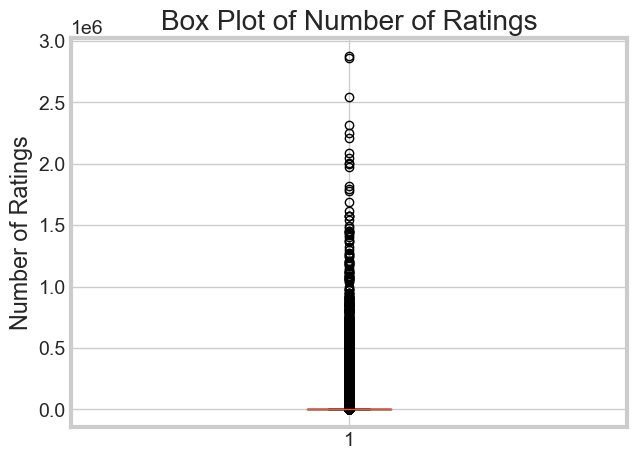

In [51]:
plt.boxplot(merged_df['Number of Ratings'].dropna())
plt.title("Box Plot of Number of Ratings")
plt.ylabel("Number of Ratings")
plt.show()

In [53]:
#This part has a big influence on the final results of our analysis as it can skew the distribution, therefore picking an optimal minimum number of ratings is crucial 
# Although a common approach to determining the minimum number of ratings threshold would be using the 25th percentile, in this case it would make more sense to use the 75% percentile as threshold given that it is a more reasonable value

# filter the "Number of Ratings" column to only include movies with at least 278 ratings i.e the top 75th percentile
merged_df = merged_df[merged_df['Number of Ratings'] >= 278]

merged_df


,Title ID,Title Type,Title Name,Is Adult,Release Year,Runtime (minutes),Genres,Average Rating,Number of Ratings
7,tt0010323,movie,The Cabinet of Dr. Caligari,False,1920,67.00,"Horror,Mystery,Thriller",8.00,69801
19,tt0010962,movie,Deception,False,1920,133.00,"Biography,Drama,Romance",6.50,785
24,tt0010969,movie,Missing Husbands,False,1921,172.00,"Adventure,Fantasy,Mystery",6.70,424
28,tt0011000,movie,Leaves From Satan's Book,False,1920,167.00,Drama,6.60,1353
57,tt0011130,movie,Dr. Jekyll and Mr. Hyde,False,1920,69.00,"Drama,Horror,Sci-Fi",6.90,6028
...,...,...,...,...,...,...,...,...,...
356096,tt9911774,movie,Padmavyuhathile Abhimanyu,False,2019,130.00,Drama,8.40,381
356104,tt9914192,movie,No Gogó do Paulinho,False,2020,98.00,Comedy,5.30,302
356111,tt9914972,movie,Blind Ambition,False,2021,96.00,Documentary,7.20,299
356121,tt9916270,movie,Il talento del calabrone,False,2020,84.00,Thriller,5.80,1476


In [54]:
merged_df.isnull().sum()

Title ID               0
Title Type             0
Title Name             0
Is Adult               0
Release Year           0
Runtime (minutes)    575
Genres                 0
Average Rating         0
Number of Ratings      0
dtype: int64

In [55]:
#Since we need the runtime of the movies and less than 1% of the movie in our dataset don't have runtime values, we can exclude the movies without runtimes
merged_df = merged_df.dropna(subset=['Runtime (minutes)'])

merged_df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 88514 entries, 7 to 356122
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Title ID           88514 non-null  object 
 1   Title Type         88514 non-null  object 
 2   Title Name         88514 non-null  object 
 3   Is Adult           88514 non-null  object 
 4   Release Year       88514 non-null  int32  
 5   Runtime (minutes)  88514 non-null  float64
 6   Genres             88514 non-null  object 
 7   Average Rating     88514 non-null  float64
 8   Number of Ratings  88514 non-null  int64  
dtypes: float64(2), int32(1), int64(1), object(5)
memory usage: 6.4+ MB


In [56]:
#Display the top 10 movies with the highest average ratings
merged_df.sort_values(by="Average Rating", ascending=False).head(10)

,Title ID,Title Type,Title Name,Is Adult,Release Year,Runtime (minutes),Genres,Average Rating,Number of Ratings
279137,tt28660608,movie,Ardhambardha Premakathe,False,2023,136.00,"Comedy,Romance",9.80,334
125175,tt0305663,movie,Illusory Thoughts,False,1989,72.00,"Documentary,Drama,Music",9.70,389
279418,tt28766081,movie,Mukalpparappu,False,2023,144.00,Family,9.70,287
295666,tt3807352,movie,Chasing Red,False,2015,68.00,"Action,Adventure,Documentary",9.70,315
188225,tt11620828,tvMovie,Threat Level Midnight: The Movie,False,2011,25.00,"Action,Comedy",9.60,10933
278393,tt28435593,movie,Nimmellara Aashirvada,False,2023,124.00,"Comedy,Drama",9.60,610
274302,tt27179211,movie,Yosi,False,2023,122.00,Thriller,9.50,478
241280,tt1852112,movie,Svet Koji Nestaje,False,1987,109.00,Documentary,9.50,365
275443,tt27525917,movie,Ramzan,False,2023,96.00,Drama,9.50,687
244613,tt19382948,movie,Buddies,False,2022,140.00,Drama,9.50,530


In [57]:
#Display the top 10 movies with the highest number of votes
merged_df.sort_values(by="Number of Ratings", ascending=False).head(10)

,Title ID,Title Type,Title Name,Is Adult,Release Year,Runtime (minutes),Genres,Average Rating,Number of Ratings
65850,tt0111161,movie,The Shawshank Redemption,False,1994,142.00,Drama,9.30,2877742
156784,tt0468569,movie,The Dark Knight,False,2008,152.00,"Action,Crime,Drama",9.00,2860204
208220,tt1375666,movie,Inception,False,2010,148.00,"Action,Adventure,Sci-Fi",8.80,2540943
77559,tt0137523,movie,Fight Club,False,1999,139.00,Drama,8.80,2313464
64923,tt0109830,movie,Forrest Gump,False,1994,142.00,"Drama,Romance",8.80,2247573
65657,tt0110912,movie,Pulp Fiction,False,1994,154.00,"Crime,Drama",8.90,2210820
164830,tt0816692,movie,Interstellar,False,2014,169.00,"Adventure,Drama,Sci-Fi",8.70,2086388
76137,tt0133093,movie,The Matrix,False,1999,136.00,"Action,Sci-Fi",8.70,2044847
36252,tt0068646,movie,The Godfather,False,1972,175.00,"Crime,Drama",9.20,2004225
71771,tt0120737,movie,The Lord of the Rings: The Fellowship of the Ring,False,2001,178.00,"Action,Adventure,Drama",8.90,1999849


In [58]:
#Display the oldest and newest movie in the dataset by year
merged_df_sorted = merged_df.sort_values(by="Release Year", ascending=True)

oldest_movie = merged_df_sorted.iloc[0]
newest_movie = merged_df_sorted.iloc[-1]

print("Oldest Movie:")
print(oldest_movie)
print("\nNewest Movie:")
print(newest_movie)

Oldest Movie:
Title ID                               tt0010323
Title Type                                 movie
Title Name           The Cabinet of Dr. Caligari
Is Adult                                   False
Release Year                                1920
Runtime (minutes)                          67.00
Genres                   Horror,Mystery,Thriller
Average Rating                              8.00
Number of Ratings                          69801
Name: 7, dtype: object

Newest Movie:
Title ID                   tt26744890
Title Type                      movie
Title Name                  Khichdi 2
Is Adult                        False
Release Year                     2023
Runtime (minutes)              121.00
Genres               Adventure,Comedy
Average Rating                   4.60
Number of Ratings                 663
Name: 273140, dtype: object


In [59]:
#Looking at correlation between the different numerical columns
numeric_cols = merged_df.select_dtypes(include=[np.number])
numeric_cols.corr()


,Release Year,Runtime (minutes),Average Rating,Number of Ratings
Release Year,1.00,0.10,-0.16,0.04
Runtime (minutes),0.10,1.00,0.17,0.10
Average Rating,-0.16,0.17,1.00,0.15
Number of Ratings,0.04,0.10,0.15,1.00


In [60]:
#Group movies by year and find the mean runtime, average rating and number of ratings for each year
yearly_avg_ratings = numeric_cols.groupby("Release Year").mean()

yearly_avg_ratings

,Runtime (minutes),Average Rating,Number of Ratings
Release Year,,,
1920,83.91,6.45,3611.15
1921,90.47,6.76,5543.94
1922,90.49,6.64,4544.92
1923,106.00,6.91,2895.56
1924,101.16,7.01,4088.73
...,...,...,...
2019,101.91,5.88,10068.80
2020,99.89,5.73,6880.74
2021,102.71,5.86,8913.58


In [61]:
#Display the years with the highest average ratings in descending order
yearly_avg_ratings.sort_values("Average Rating", ascending=False)

,Runtime (minutes),Average Rating,Number of Ratings
Release Year,,,
1924,101.16,7.01,4088.73
1928,88.00,6.95,3376.96
1923,106.00,6.91,2895.56
1925,89.92,6.87,5872.86
1926,87.93,6.86,2986.62
...,...,...,...
2013,100.64,5.84,16890.49
2015,100.02,5.84,12114.94
2011,99.73,5.83,17862.04


Text(0, 0.5, 'Average number of rating')

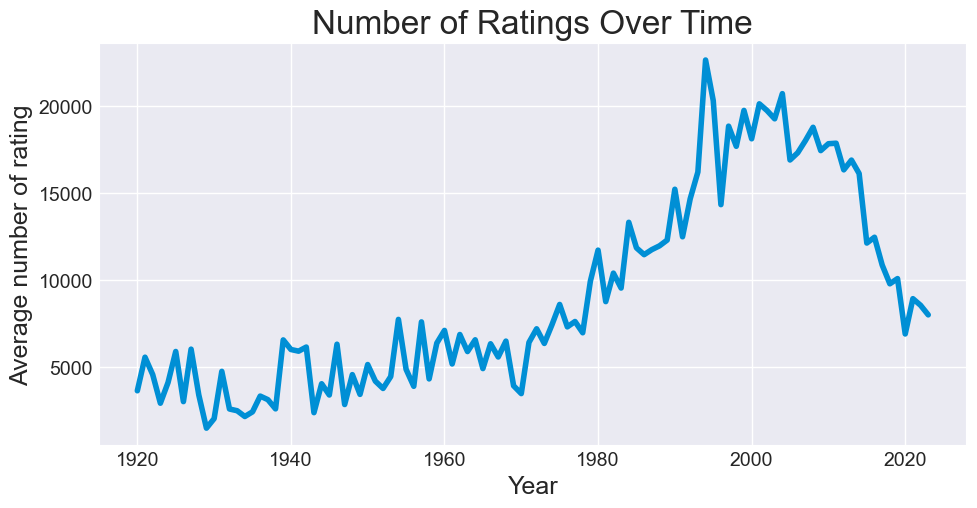

In [62]:
#Line Chart for number of ratings over time
sns.set_style("darkgrid")
plt.figure(figsize=(10, 5))
yearly_avg_ratings["Number of Ratings"].plot(kind='line')
plt.title("Number of Ratings Over Time", fontsize = 24)
plt.xlabel("Year", fontsize = 18 )
plt.ylabel('Average number of rating', fontsize = 18)

Text(0, 0.5, 'Average rating')

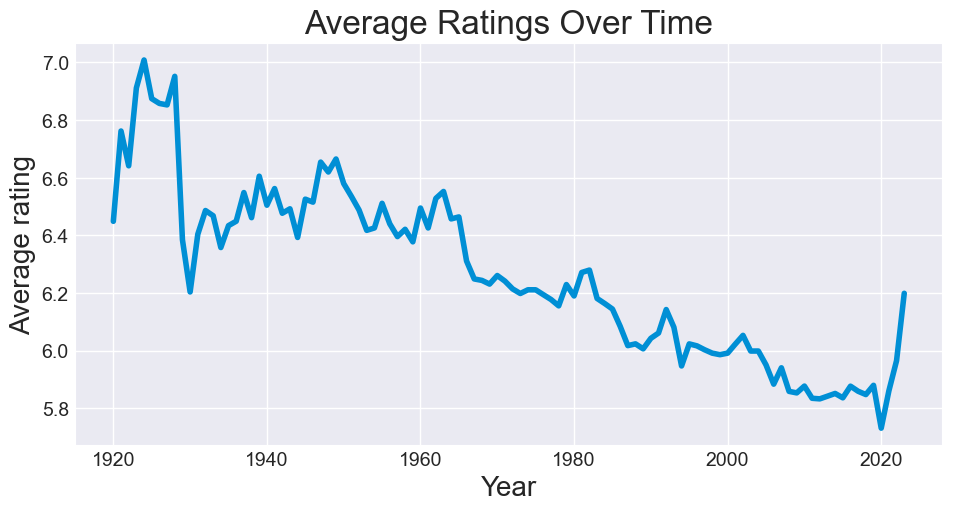

In [63]:
#Line chart for average ratings overtime

sns.set_style("darkgrid")
plt.figure(figsize=(10, 5))
yearly_avg_ratings["Average Rating"].plot(kind='line')
plt.title("Average Ratings Over Time", fontsize = 24)
plt.xlabel("Year", fontsize = 20 )
plt.ylabel('Average rating', fontsize = 20)

In [64]:
#Exploding genres to analyze the data by individual genres later

#create a copy of merged_df and name it merged_df2
merged_df2 = merged_df.copy()

# Split the 'Genres' column into a list of genres

merged_df2['Genres'] = merged_df2['Genres'].str.split(',')

# Explode the genres list into individual rows
exploded_genres_df = merged_df2.explode('Genres')

# Now we can perform analysis on a genre level
# For example, to get the mean rating for each genre:
genre_mean_ratings = exploded_genres_df.groupby('Genres')['Average Rating'].mean()
genre_mean_ratings

Genres
Action        5.61
Adult         5.55
Adventure     5.82
Animation     6.47
Biography     6.81
Comedy        5.93
Crime         6.08
Documentary   7.12
Drama         6.28
Family        6.04
Fantasy       5.74
Film-Noir     6.63
Game-Show     6.90
History       6.73
Horror        4.89
Music         6.59
Musical       6.34
Mystery       5.79
News          7.15
Reality-TV    5.90
Romance       6.19
Sci-Fi        5.04
Sport         6.41
Talk-Show     7.20
Thriller      5.48
War           6.57
Western       6.04
\N            7.28
Name: Average Rating, dtype: float64

In [65]:
exploded_genres_df

,Title ID,Title Type,Title Name,Is Adult,Release Year,Runtime (minutes),Genres,Average Rating,Number of Ratings
7,tt0010323,movie,The Cabinet of Dr. Caligari,False,1920,67.00,Horror,8.00,69801
7,tt0010323,movie,The Cabinet of Dr. Caligari,False,1920,67.00,Mystery,8.00,69801
7,tt0010323,movie,The Cabinet of Dr. Caligari,False,1920,67.00,Thriller,8.00,69801
19,tt0010962,movie,Deception,False,1920,133.00,Biography,6.50,785
19,tt0010962,movie,Deception,False,1920,133.00,Drama,6.50,785
...,...,...,...,...,...,...,...,...,...
356104,tt9914192,movie,No Gogó do Paulinho,False,2020,98.00,Comedy,5.30,302
356111,tt9914972,movie,Blind Ambition,False,2021,96.00,Documentary,7.20,299
356121,tt9916270,movie,Il talento del calabrone,False,2020,84.00,Thriller,5.80,1476
356122,tt9916362,movie,Coven,False,2020,92.00,Drama,6.40,5759


In [66]:
len(exploded_genres_df['Genres'].unique())

28

In [67]:
#Creating a new column called Movie Genre ID which has the original ID but a number to uniquely identify 
#The genre number for each movie as there are multiple rows of the same movies now

#Start by renaming the ID column to Movie ID
exploded_genres_df = exploded_genres_df.rename(columns={'Title ID': "Movie ID"})

# Create a new column that counts the occurrence of each Movie ID and adds 1 to make it start from 1
exploded_genres_df['Genre Number'] = exploded_genres_df.groupby('Movie ID').cumcount() + 1

# Generate the new Movie Genre ID column by combining Movie ID and Genre Number
exploded_genres_df['Movie Genre ID'] = exploded_genres_df['Movie ID'] + "-G" + exploded_genres_df['Genre Number'].astype(str)


exploded_genres_df


,Movie ID,Title Type,Title Name,Is Adult,Release Year,Runtime (minutes),Genres,Average Rating,Number of Ratings,Genre Number,Movie Genre ID
7,tt0010323,movie,The Cabinet of Dr. Caligari,False,1920,67.00,Horror,8.00,69801,1,tt0010323-G1
7,tt0010323,movie,The Cabinet of Dr. Caligari,False,1920,67.00,Mystery,8.00,69801,2,tt0010323-G2
7,tt0010323,movie,The Cabinet of Dr. Caligari,False,1920,67.00,Thriller,8.00,69801,3,tt0010323-G3
19,tt0010962,movie,Deception,False,1920,133.00,Biography,6.50,785,1,tt0010962-G1
19,tt0010962,movie,Deception,False,1920,133.00,Drama,6.50,785,2,tt0010962-G2
...,...,...,...,...,...,...,...,...,...,...,...
356104,tt9914192,movie,No Gogó do Paulinho,False,2020,98.00,Comedy,5.30,302,1,tt9914192-G1
356111,tt9914972,movie,Blind Ambition,False,2021,96.00,Documentary,7.20,299,1,tt9914972-G1
356121,tt9916270,movie,Il talento del calabrone,False,2020,84.00,Thriller,5.80,1476,1,tt9916270-G1
356122,tt9916362,movie,Coven,False,2020,92.00,Drama,6.40,5759,1,tt9916362-G1


In [68]:
#Reformat the datatable to remove the Genre Number column and place the Movie Genre ID at the start

exploded_genres_df = exploded_genres_df.drop('Genre Number', axis=1)

# Create a list of column names in the df with Movie Genre ID at the beginning
columns = ['Movie Genre ID'] + [col for col in exploded_genres_df if col != 'Movie Genre ID']

#Reorder the dataframe with the new list

exploded_genres_df = exploded_genres_df[columns]
exploded_genres_df


,Movie Genre ID,Movie ID,Title Type,Title Name,Is Adult,Release Year,Runtime (minutes),Genres,Average Rating,Number of Ratings
7,tt0010323-G1,tt0010323,movie,The Cabinet of Dr. Caligari,False,1920,67.00,Horror,8.00,69801
7,tt0010323-G2,tt0010323,movie,The Cabinet of Dr. Caligari,False,1920,67.00,Mystery,8.00,69801
7,tt0010323-G3,tt0010323,movie,The Cabinet of Dr. Caligari,False,1920,67.00,Thriller,8.00,69801
19,tt0010962-G1,tt0010962,movie,Deception,False,1920,133.00,Biography,6.50,785
19,tt0010962-G2,tt0010962,movie,Deception,False,1920,133.00,Drama,6.50,785
...,...,...,...,...,...,...,...,...,...,...
356104,tt9914192-G1,tt9914192,movie,No Gogó do Paulinho,False,2020,98.00,Comedy,5.30,302
356111,tt9914972-G1,tt9914972,movie,Blind Ambition,False,2021,96.00,Documentary,7.20,299
356121,tt9916270-G1,tt9916270,movie,Il talento del calabrone,False,2020,84.00,Thriller,5.80,1476
356122,tt9916362-G1,tt9916362,movie,Coven,False,2020,92.00,Drama,6.40,5759


In [69]:
# Add a column indicating the decade in which the movie was released

#Get the decade of the movie
def decade_generator(year):
    return (year //10) * 10

#Add the decade columnm to the data frame

exploded_genres_df["Decade"]= exploded_genres_df["Release Year"].apply(decade_generator)


In [70]:
exploded_genres_df

,Movie Genre ID,Movie ID,Title Type,Title Name,Is Adult,Release Year,Runtime (minutes),Genres,Average Rating,Number of Ratings,Decade
7,tt0010323-G1,tt0010323,movie,The Cabinet of Dr. Caligari,False,1920,67.00,Horror,8.00,69801,1920
7,tt0010323-G2,tt0010323,movie,The Cabinet of Dr. Caligari,False,1920,67.00,Mystery,8.00,69801,1920
7,tt0010323-G3,tt0010323,movie,The Cabinet of Dr. Caligari,False,1920,67.00,Thriller,8.00,69801,1920
19,tt0010962-G1,tt0010962,movie,Deception,False,1920,133.00,Biography,6.50,785,1920
19,tt0010962-G2,tt0010962,movie,Deception,False,1920,133.00,Drama,6.50,785,1920
...,...,...,...,...,...,...,...,...,...,...,...
356104,tt9914192-G1,tt9914192,movie,No Gogó do Paulinho,False,2020,98.00,Comedy,5.30,302,2020
356111,tt9914972-G1,tt9914972,movie,Blind Ambition,False,2021,96.00,Documentary,7.20,299,2020
356121,tt9916270-G1,tt9916270,movie,Il talento del calabrone,False,2020,84.00,Thriller,5.80,1476,2020
356122,tt9916362-G1,tt9916362,movie,Coven,False,2020,92.00,Drama,6.40,5759,2020


In [71]:
# Group by 'Genres' and 'Start Year' and calculate the mean rating
genre_year_avg_rating = exploded_genres_df.groupby(['Genres', 'Release Year'])['Average Rating'].mean()

# Pivot the table for better readability (optional)
pivot_table = genre_year_avg_rating.unstack(level=0)

print(pivot_table)

Genres        Action  Adult  Adventure  Animation  Biography  Comedy  Crime  \
Release Year                                                                  
1920            6.70    NaN       6.36        NaN       5.85    6.37   6.95   
1921            6.73    NaN       6.67        NaN        NaN    6.74   6.45   
1922            6.45    NaN       6.66        NaN       6.60    6.48   7.80   
1923            8.10    NaN       6.95        NaN       6.80    7.13    NaN   
1924            7.90    NaN       7.41        NaN        NaN    6.88   7.00   
...              ...    ...        ...        ...        ...     ...    ...   
2019            5.53   3.80       5.79       6.33       6.84    5.71   5.94   
2020            5.26    NaN       5.54       6.08       6.53    5.68   5.69   
2021            5.43    NaN       5.77       6.31       6.82    5.81   5.95   
2022            5.58    NaN       5.78       6.50       6.84    5.90   6.09   
2023            5.87    NaN       5.96       6.69   

In [73]:
#Selecting a subset of genres for analysis

selected_genres = ['Drama', 'Comedy', 'Action', 'Romance', 'Sci-Fi']  

# Filter the pivot table to include only the selected genres
filtered_pivot_table = pivot_table[selected_genres]



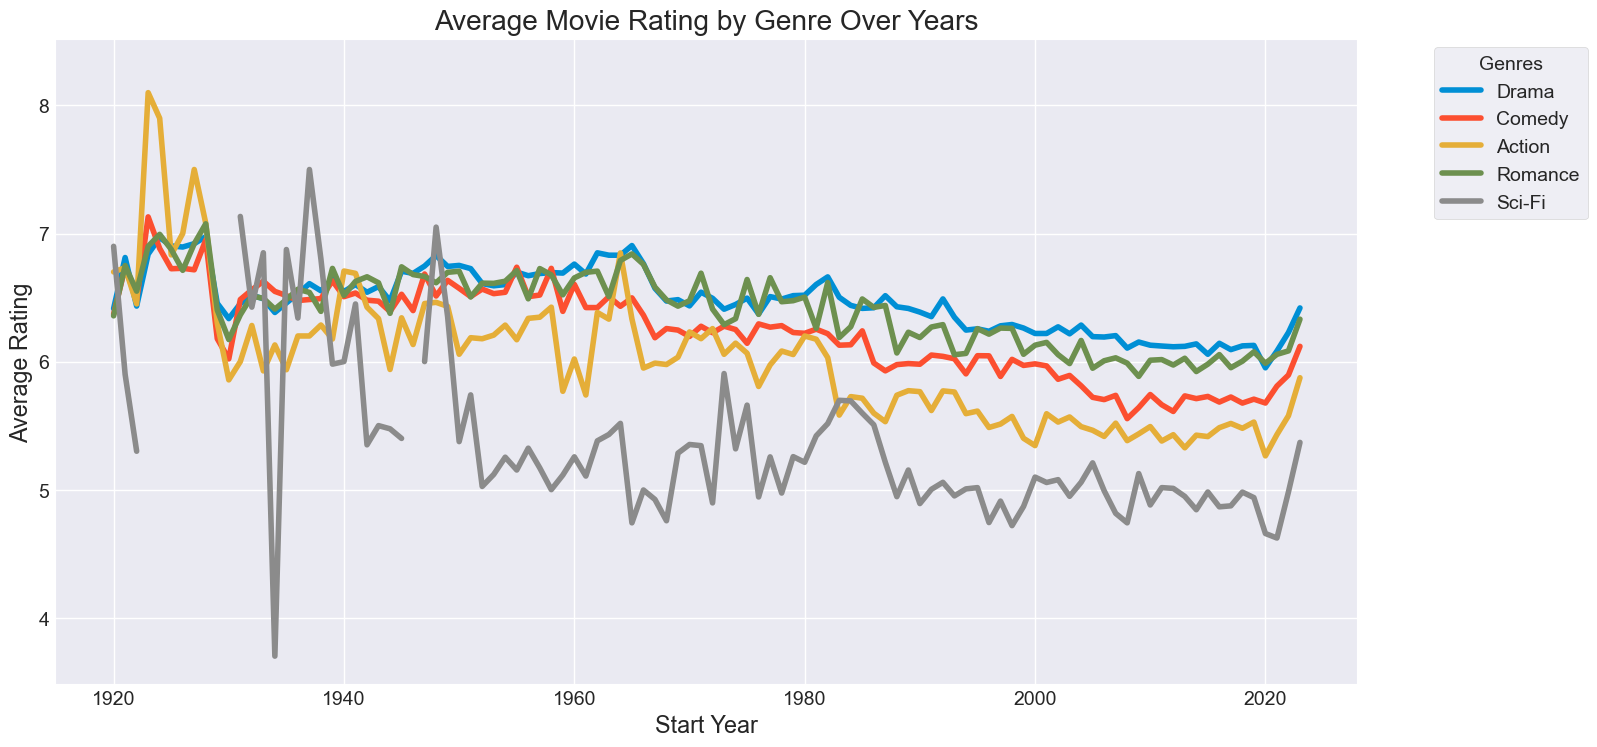

In [74]:
#plotting with all genres
#pivot_table.plot(kind='line', figsize=(15, 8))

#plotting results with subset of genres
filtered_pivot_table.plot(kind='line', figsize=(15, 8))


# Adding labels and title for clarity
plt.xlabel('Start Year')
plt.ylabel('Average Rating')
plt.title('Average Movie Rating by Genre Over Years')
plt.legend(title='Genres', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)

# Show the plot
plt.show()

In [75]:
# Calculate the correlation of ratings for each genre compared to the overall rating average over time given that the correlation seems high

# Calculate the overall average rating per year
overall_avg_rating_per_year = exploded_genres_df.groupby('Release Year')['Average Rating'].mean()

# Initialize a dictionary to store correlation results
genre_correlation = {}

# Calculate the correlation for each selected genre
for genre in selected_genres:
    # Extract the average rating per year for the current genre
    genre_avg_rating_per_year = pivot_table[genre]
    
    # Calculate the correlation with the overall average rating
    correlation = genre_avg_rating_per_year.corr(overall_avg_rating_per_year)
    
    # Store the result in the dictionary
    genre_correlation[genre] = correlation

# Print the correlation results
print("Correlation of ratings for each genre compared to the overall rating average over time:")
for genre, corr in genre_correlation.items():
    print(f"{genre}: {corr:.2f}")

Correlation of ratings for each genre compared to the overall rating average over time:
Drama: 0.91
Comedy: 0.96
Action: 0.91
Romance: 0.90
Sci-Fi: 0.64


In [76]:
#Export the movies with ratings dataframe to a CSV file for data visualization in Tableau

exploded_genres_df.to_csv('IMDb_movie_ratingsNEW.csv', index=False)